In [80]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

import contextily as ctx

https://www.naturalearthdata.com

https://search.dataone.org/view/doi%3A10.18739%2FA28S4JQ80

https://contextily.readthedocs.io/en/latest/intro_guide.html

In [90]:
pd.set_option("display.max.columns", None)

In [6]:
communities = gpd.read_file('https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4')
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


In [7]:
us_comms = communities[communities.country == "US"]

<AxesSubplot:ylabel='Frequency'>

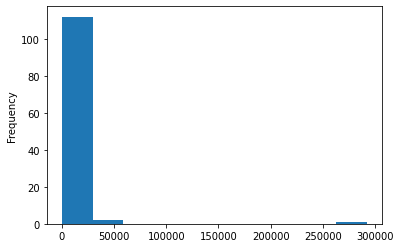

In [13]:
us_comms.population.plot(kind='hist')

In [15]:
us_comms.population.max()

291826

In [45]:
us_comms['log_pop'] = np.log(us_comms.population)

/opt/anaconda3/envs/gee_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [53]:
us_comms['log_pop']

1257    10.350574
1258     6.322565
1259     8.993427
1260     6.626718
1261     7.247793
          ...    
1394     6.751101
1395     6.998510
1396     7.277248
1397     7.138867
1423     8.798002
Name: log_pop, Length: 115, dtype: float64

In [28]:
#gpd.datasets.available()

TypeError: 'list' object is not callable

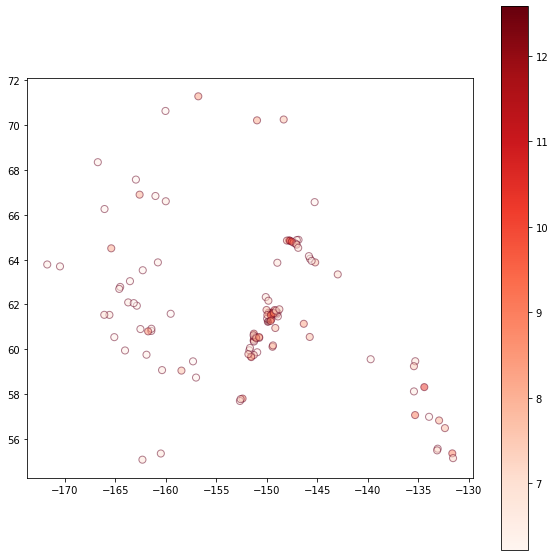

In [65]:
fig, ax = plt.subplots( figsize=(10, 10))

us_comms.plot(ax=ax, 
             #markersize='log_pop'
             markersize = 50,
             alpha=0.5,
             column=np.log(us_comms.population),
             edgecolor="xkcd:maroon",
             cmap='Reds',
             legend=True
            )
# cx.add_basemap(ax=ax, 
#                attribution=False,
#                crs=us_comms.crs.to_string())
#                #source=cx.providers.Stamen.TonerLite)
plt.show()

In [32]:
nat_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
nat_earth

/var/folders/2t/z8yp2j2x6xx2yx79s5y4w7gr0000gn/T/ipykernel_1686/3081358086.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  nat_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [34]:
canada = nat_earth[nat_earth.name=='Canada']

<AxesSubplot:>

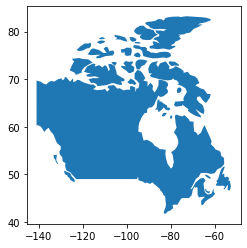

In [36]:
canada.plot()

In [75]:
n_comm = communities.groupby('country').count().name.rename('n_communities')
n_comm

country
AX      1
BY      8
CA      7
DK     72
EE     14
FI     98
FO      1
GB     96
GL      1
IS      5
LT     26
LV     25
NO     48
RU    774
SE    133
US    115
Name: n_communities, dtype: int64

In [147]:
n_comms = pd.DataFrame(n_comm).reset_index()

country_names = ['Aland Islands',
 'Belarus',
 'Canada',
 'Denmark',
 'Estonia',
 'Finland',
 'Faroe Islands',
 'United Kingdom',
 'Greenland',
 'Iceland',
  'Lithuania',
  'Latvia',
  'Norway',
  'Russia',
  'Sweden',
  'United States of America',
  None]

n_comms['ADMIN'] = country_names
n_comms

,country,n_communities,ADMIN
0,AX,1,Aland Islands
1,BY,8,Belarus
2,CA,7,Canada
3,DK,72,Denmark
4,EE,14,Estonia
5,FI,98,Finland
6,FO,1,Faroe Islands
7,GB,96,United Kingdom
8,GL,1,Greenland
9,IS,5,Iceland


In [91]:
countries = gpd.read_file('ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,Zimbabwe,ZWE,Zimbabwe,None,Zimb.,ZW,Republic of Zimbabwe,None,Zimbabwe,None,None,Zimbabwe,None,1,5,3,9,14645468.0,14,2019,21440,2019,5. Emerging region: G20,5. Low income,ZI,ZW,ZW,ZWE,ZWE,716,716,716,ZW,ZWE,23425004,23425004,Exact WOE match as country,ZWE,None,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,2.5,8.0,29.925444,-18.911640,1159321441,Q954,زيمبابوي,জিম্বাবুয়ে,Simbabwe,Zimbabwe,Zimbabue,زیمبابوه,Zimbabwe,Ζιμπάμπουε,זימבבואה,ज़िम्बाब्वे,Zimbabwe,Zimbabwe,Zimbabwe,ジンバブエ,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Зімбабве,زمبابوے,Zimbabwe,津巴布韦,辛巴威,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,Zambia,ZMB,Zambia,None,Zambia,ZM,Republic of Zambia,None,Zambia,None,None,Zambia,None,5,8,5,13,17861030.0,14,2019,23309,2019,7. Least developed region,4. Lower middle income,ZA,ZM,ZM,ZMB,ZMB,894,894,894,ZM,ZMB,23425003,23425003,Exact WOE match as country,ZMB,None,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,0.0,3.0,8.0,26.395298,-14.660804,1159321439,Q953,زامبيا,জাম্বিয়া,Sambia,Zambia,Zambia,زامبیا,Zambie,Ζάμπια,זמביה,ज़ाम्बिया,Zambia,Zambia,Zambia,ザンビア,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Замбія,زیمبیا,Zambia,赞比亚,尚比亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,YEM,0,Yemen,YEM,0,Yemen,YEM,0,Yemen,Yemen,YEM,Yemen,None,Yem.,YE,Republic of Yemen,None,Yemen,None,None,"Yemen, Rep.",None,5,3,3,11,29161922.0,15,2019,22581,2019,7. Least developed region,4. Lower middle income,YM,YE,YE,YEM,YEM,887,887,887,RY,YEM,23425

In [142]:
# all except Aland Islands
countries[countries.ADMIN.isin(country_names)].ADMIN.unique()

array(['United States of America', 'United Kingdom', 'Sweden', 'Russia',
       'Norway', 'Lithuania', 'Latvia', 'Iceland', 'Finland', 'Estonia',
       'Greenland', 'Faroe Islands', 'Denmark', 'Canada', 'Belarus'],
      dtype=object)

In [144]:
arctic_countries = countries[countries.ADMIN.isin(country_names)]
arctic_countries = arctic_countries[['ADMIN','TYPE','geometry']]
arctic_countries

,ADMIN,TYPE,geometry
16,United States of America,Country,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576..."
31,United Kingdom,Country,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51..."
48,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57..."
75,Russia,Sovereign country,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ..."
88,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69..."
120,Lithuania,Sovereign country,"MULTIPOLYGON (((20.95781 55.27891, 20.89980 55..."
126,Latvia,Sovereign country,"POLYGON ((26.59355 55.66753, 26.54287 55.67241..."
145,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224..."
169,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65..."
172,Estonia,Sovereign country,"MULTIPOLYGON (((27.35195 57.52812, 27.32656 57..."


In [141]:
'Aland Islands' in countries.values

False

<AxesSubplot:>

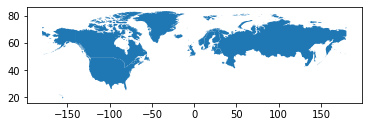

In [146]:
arctic_countries.plot(arctic_countries)

- Aland Islands -> Finland , 

In [150]:
arctic_countries = pd.merge(arctic_countries,n_comms)
arctic_countries

,ADMIN,TYPE,geometry,country,n_communities
0,United States of America,Country,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576...",US,115
1,United Kingdom,Country,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51...",GB,96
2,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
3,Russia,Sovereign country,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ...",RU,774
4,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
5,Lithuania,Sovereign country,"MULTIPOLYGON (((20.95781 55.27891, 20.89980 55...",LT,26
6,Latvia,Sovereign country,"POLYGON ((26.59355 55.66753, 26.54287 55.67241...",LV,25
7,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
8,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
9,Estonia,Sovereign country,"MULTIPOLYGON (((27.35195 57.52812, 27.32656 57...",EE,14


In [169]:
fig, ax = plt.subplots( figsize=(10, 10))
arctic_countries.plot(ax=ax,
                      column='n_communities',
                       cmap='BuPu',
                       legend=True,
                       #edgecolor="gray"
                       )

SyntaxError: unexpected EOF while parsing (3593083614.py, line 7)

In [ ]:
arctic_countries.plot(column='n_communities')

<AxesSubplot:>

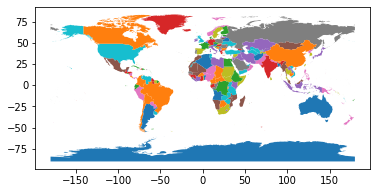

In [166]:
countries.plot(column='ADMIN', 
               categorical=True)